# Introduction to Random Forest Algorithm
Random forest algorithm can use both for classification and the regression kind of problems. Random forest algorithm is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees. In general, the more trees in the forest the more robust the forest looks like. In the same way in the random forest classifier, the higher the number of trees in the forest gives the high accuracy results.

Before, we dive into Random Forest algorithm, you need to know how Decision Tree algorithm works. Please follow this link to get better understanding of Decision Tree algorithm: https://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

In random forest algorithm, Instead of using information gain or gini index for calculating the root node, the process of finding the root node and splitting the feature nodes will happen randomly. Why random forest algorithm:
- The same random forest algorithm or the random forest classifier can use for both classification and the regression task.
- Random forest classifier will handle the missing values.
- When we have more trees in the forest, random forest classifier won’t overfit the model.
- Can model the random forest classifier for categorical values also.

<img src="http://drive.google.com/uc?export=view&id=1GRfl5klPbHP4qrO49bdsWImRJhM2tcrW" />

Random forest algorithm is an ensemble classification algorithm. Ensemble classifier means a group of classifiers. Instead of using only one classifier to predict the target, In ensemble, we use multiple classifiers to predict the target. In case, of random forest, these ensemble classifiers are the randomly created decision trees. Each decision tree is a single classifier and the target prediction is based on the majority voting method. The majority voting concept is same as the political votings. Each person votes per one political party out all the political parties participating in elections. In the same way, every classifier will votes to one target class out of all the target classes. To declare the election results. The votes will calculate and the party which got the most number of votes treated as the election winner. In the same way, the target class which got the most number of votes considered as the final predicted target class.

To understand more and how it will be implemented as coding, we will be taking 2 datasets, one will have classifier target and other will have regressor target. Let's start with classifier target. We will use breast cancer dataset to implement the random forest. This breast cancer dataset is the most popular classification dataset. Which is having 10 features and 1 target class.

In [36]:
# Import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 6)

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() #load the breast cancer dataset
print('Size of Breast Cancer dataset: ', cancer.data.shape)
print('\nBreast Cancer Features: ', cancer.feature_names)
print('\nBreast Cancer Target Response: ', cancer.target_names)

Size of Breast Cancer dataset:  (569, 30)

Breast Cancer Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Breast Cancer Target Response:  ['malignant' 'benign']


### Train Random Forest Model & Visualize Random Forest Trees
Let's split the features and target into train and test dataset. Then build random forest model using train dataset. Once, the model is trained, let's look into the default parameters that were used to build this model. Also, visualize the different trees created by rnadom forest model.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=50)

random_class = RandomForestClassifier()
random_class.fit(X_train, y_train)

print("Random Forest Default Parameters: \n", random_class.get_params())

Random Forest Default Parameters: 
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


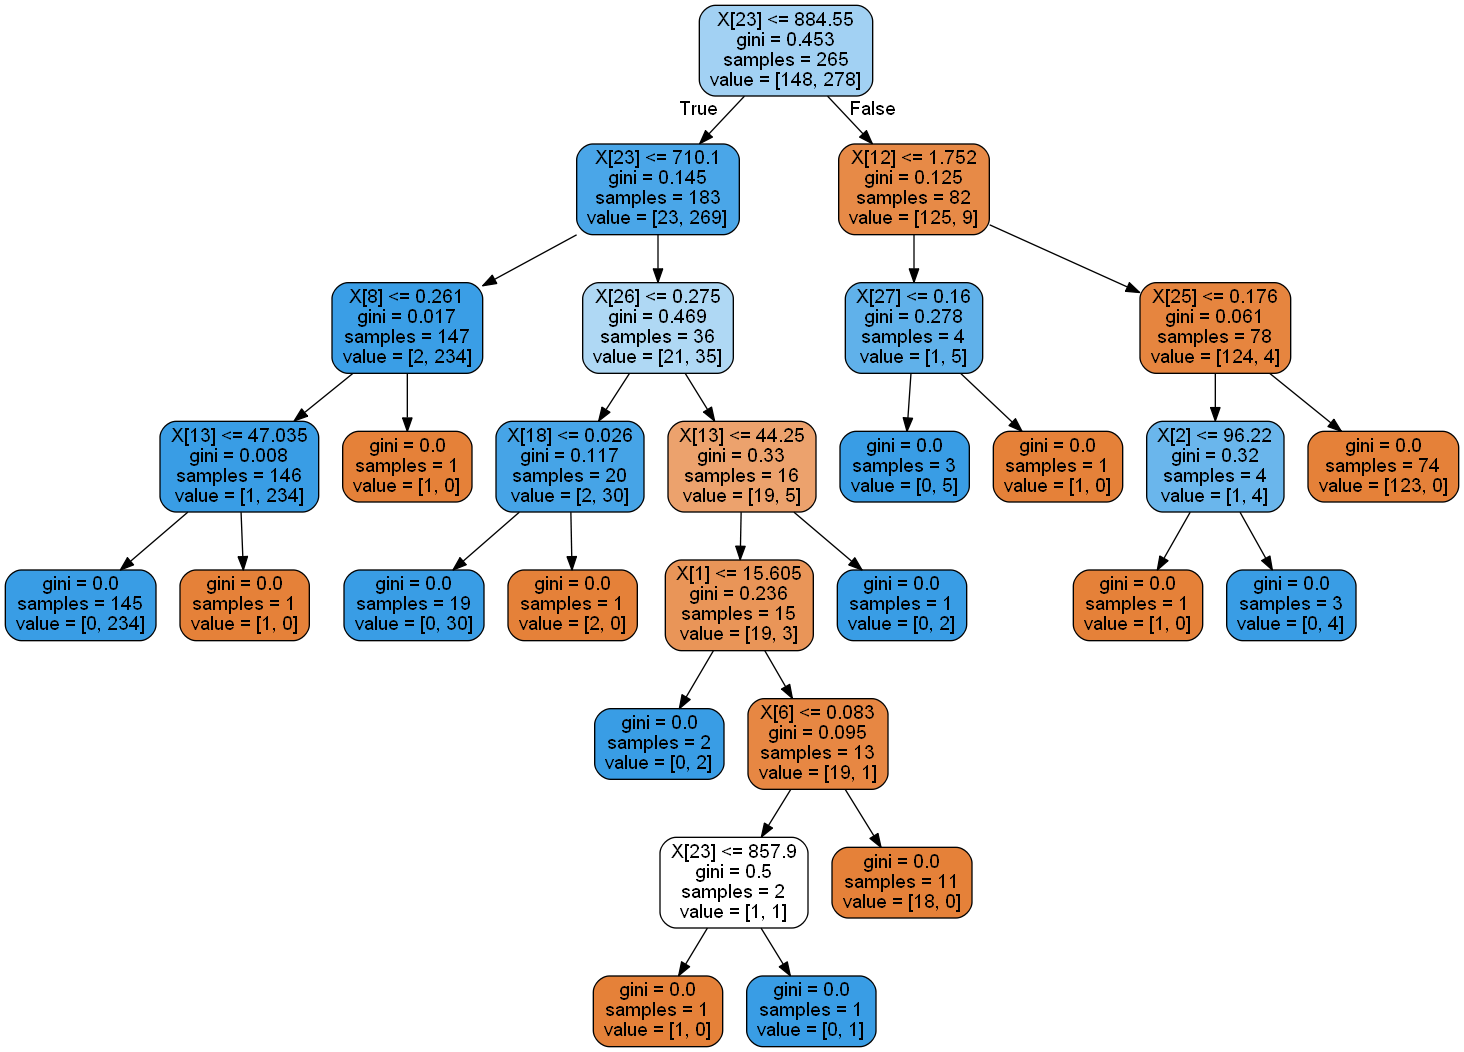

In [39]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

rf_tree = random_class.estimators_[5]
dot_data = export_graphviz(rf_tree, out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Predict target values using Test Dataset
Now, let's predict the target class values using the model trained and identify various metrics & accuracy of the model on both train and test dataset.

In [40]:
y_train_pred = random_class.predict(X_train)

y_test_pred = random_class.predict(X_test)

print('Train Dataset Accuracy Score: ', metrics.accuracy_score(y_train, y_train_pred))
print('\nTest Dataset Accuracy Score : ', metrics.accuracy_score(y_test, y_test_pred))

print('\nTest Dataset Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_test_pred))  
print('\nTest Dataset Classification Report: \n', metrics.classification_report(y_test, y_test_pred)) 

Train Dataset Accuracy Score:  0.99765258216

Test Dataset Accuracy Score :  0.951048951049

Test Dataset Confusion Matrix: 
 [[50  3]
 [ 4 86]]

Test Dataset Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.94      0.93        53
          1       0.97      0.96      0.96        90

avg / total       0.95      0.95      0.95       143



### Visualize Importance of Features
In order to quantify the usefulness of all the features in the entire random forest, we can look at the relative importances of the features. Let's visualize the importance of each features through graph. In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method.

In [41]:
# Get numerical feature importances
importances = list(random_class.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cancer.feature_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: worst area           Importance: 0.28
Variable: worst concave points Importance: 0.19
Variable: worst radius         Importance: 0.11
Variable: mean compactness     Importance: 0.08
Variable: mean radius          Importance: 0.05
Variable: radius error         Importance: 0.05
Variable: mean perimeter       Importance: 0.03
Variable: worst compactness    Importance: 0.03
Variable: mean texture         Importance: 0.02
Variable: mean concavity       Importance: 0.02
Variable: area error           Importance: 0.02
Variable: worst smoothness     Importance: 0.02
Variable: worst concavity      Importance: 0.02
Variable: mean smoothness      Importance: 0.01
Variable: mean concave points  Importance: 0.01
Variable: mean symmetry        Importance: 0.01
Variable: mean fractal dimension Importance: 0.01
Variable: concavity error      Importance: 0.01
Variable: worst texture        Importance: 0.01
Variable: worst perimeter      Importance: 0.01
Variable: worst symmetry       Importa

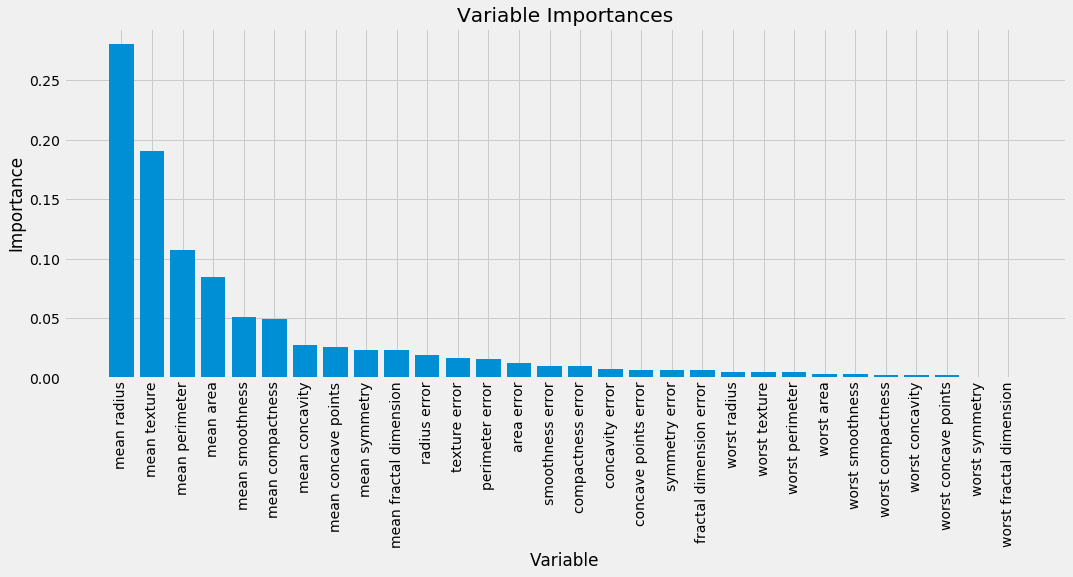

In [42]:
# Plot Features Importance as bar graph
importances = sorted(importances, reverse = True)
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, cancer.feature_names, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The accuracy score can be improved by selecting different random forest parameters line n_estimators, max_depth, criterion, etc. However, trying different combinations can be time consuming. However, python gives us a feature called "GridSearchCV" which can iterate for multiple combinations directly and provide us the best estimators. We will look into that feature in the next examples.

#### How the Random Forest Algorithm Works.
The following are the basic steps involved in performing the random forest algorithm:
- Pick N random records from the dataset.
- Build a decision tree based on these N records.
- Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
- In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

#### Advantages of using Random Forest
- As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.
- The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.
- This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
- The random forest algorithm works well when you have both categorical and numerical features.
- The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).

#### Disadvantages of using Random Forest
- A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
- Due to their complexity, they require much more time to train than other comparable algorithms.
- Throughout the rest of this article we will see how Python's Scikit-Learn library can be used to implement the random forest algorithm to solve regression, as well as classification, problems.

Let's take another example of regressor and classifier dataset for building Random Forest model, predict the outcomes and observe the performance of model. We will also take a look into how to identfy the best parameters that random forest algorithm needs to use based on the best score identified by GridSearchCV algorithm.
## Part 1: Using Random Forest for Regression
Problem Definition: The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license. We will be using Petrol Consumption dataset.

In [43]:
# Loading Petrol Consumption Dataset
dataset_petrol = pd.read_csv('https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/petrol_consumption.csv')

print("Dataset Shape: ", dataset_petrol.shape)
print("\nDataset: \n", dataset_petrol.head())
print("\nDataset Statistics: \n", dataset_petrol.describe())

Dataset Shape:  (48, 5)

Dataset: 
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Dataset Statistics: 
        Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50% 

In [44]:
X = dataset_petrol.drop('Petrol_Consumption', axis=1)  
y = dataset_petrol['Petrol_Consumption']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

regressor = RandomForestRegressor()  # Running Decision tree model with default parameters
regressor.fit(X_train, y_train) 

regressor.get_params() # Let's look into the default parameters of model

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
y_pred = regressor.predict(X_train) # Predict the values using train dataset

df = pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
df['Residuals'] = df['Actual'] - df['Predicted']
df.describe()

,Actual,Predicted,Residuals
count,38.000000,38.000000,38.000000
mean,583.973684,585.960526,-1.986842
std,118.585010,108.520419,33.177925
min,344.000000,369.400000,-132.000000
25%,513.500000,516.425000,-16.675000
50%,566.000000,592.800000,0.500000
75%,638.750000,628.900000,11.575000
max,968.000000,884.700000,83.300000


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred))) 
print('R2 Squared:', metrics.r2_score(y_train, y_pred)) 

Mean Absolute Error: 20.7131578947
Mean Squared Error: 1075.75447368
Root Mean Squared Error: 32.7986962193
R2 Squared: 0.921433855521


In [47]:
y_pred = regressor.predict(X_test) # Predict the values using test dataset

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df['Residuals'] = df['Actual'] - df['Predicted']
df.describe()

,Actual,Predicted,Residuals
count,10.000000,10.000000,10.000000
mean,549.400000,562.100000,-12.700000
std,80.687601,54.083536,63.328824
min,410.000000,464.900000,-109.400000
25%,498.750000,519.700000,-44.250000
50%,574.000000,588.100000,-24.550000
75%,579.250000,601.875000,22.425000
max,704.000000,614.100000,89.900000


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R2 Squared:', metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 51.54
Mean Squared Error: 3770.776
Root Mean Squared Error: 61.4066445916
R2 Squared: 0.356461368322


In [49]:
from sklearn.grid_search import GridSearchCV

param_RF = { "n_estimators"      : [10, 30, 50],
             "criterion"         : ["mse", "mae"],
             "max_features"      : ["auto", "sqrt", "log2"],
             "max_depth"         : [5, 10, 15],
             "min_samples_split" : [2, 4, 8],
             "bootstrap"         : [True, False] }
grid_RF = GridSearchCV(estimator=regressor, param_grid=param_RF, n_jobs=1, cv=3)

grid_RF.fit(X_train, y_train)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

0.5687680216423437
{'bootstrap': False, 'criterion': 'mae', 'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 30}


In [50]:
final_modelRF = grid_RF.best_estimator_
final_modelRF.fit(X_train, y_train)

y_pred = final_modelRF.predict(X_train)
print('Root Mean Squared Error of Train Dataset:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

y_pred = final_modelRF.predict(X_test)
print('Root Mean Squared Error of Test Dataset:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error of Train Dataset: 19.4884539967
Root Mean Squared Error of Test Dataset: 53.8926896712


### Part 2: Using Random Forest for Classification
Problem Definition: The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image. We will use banknote authentication data for classification model.

In [51]:
# Loading Bill Authentication Dataset
dataset_bill = pd.read_csv("https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/bill_authentication.csv")

print("Dataset Shape: ", dataset_bill.shape)
print("\nDataset: \n", dataset_bill.head())
print("\nDataset Statistics: \n", dataset_bill.describe())

Dataset Shape:  (1372, 5)

Dataset: 
    Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Dataset Statistics: 
           Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [53]:
X = dataset_bill.drop('Class', axis=1)  
y = dataset_bill['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = RandomForestClassifier()  # Running Decision tree model with default parameters
classifier.fit(X_train, y_train)  

classifier.get_params() # Let's look into the default parameters of model

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
y_pred = classifier.predict(X_train) # Predict the class for train dataset

print('Train Dataset - Confusion Matrix: \n',metrics.confusion_matrix(y_train, y_pred))  
print('\nTrain Dataset - Classification Report: \n',metrics.classification_report(y_train, y_pred)) 
print('\nTrain Dataset - Accuracy Score: ',metrics.accuracy_score(y_train, y_pred)) 

Train Dataset - Confusion Matrix: 
 [[598   0]
 [  0 499]]

Train Dataset - Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       598
          1       1.00      1.00      1.00       499

avg / total       1.00      1.00      1.00      1097


Train Dataset - Accuracy Score:  1.0


In [55]:
y_pred = classifier.predict(X_test) # Predict the class for test dataset

print('Test Dataset - Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_pred))  
print('\nTest Dataset - Classification Report: \n',metrics.classification_report(y_test, y_pred)) 
print('\nTest Dataset - Accuracy Score: ',metrics.accuracy_score(y_test, y_pred)) 

Test Dataset - Confusion Matrix: 
 [[164   0]
 [  0 111]]

Test Dataset - Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       164
          1       1.00      1.00      1.00       111

avg / total       1.00      1.00      1.00       275


Test Dataset - Accuracy Score:  1.0


In [57]:
# Grid search in Random Forest
from sklearn.grid_search import GridSearchCV

param_RF = { "n_estimators"      : [10, 30, 50],
             "criterion"         : ["gini", "entropy"],
             "max_features"      : [2, 3, 4],
             "max_depth"         : [10, 15],
             "min_samples_split" : [2, 5, 10] }
grid_RF = GridSearchCV(estimator=classifier, param_grid=param_RF,cv = 3,scoring = "accuracy")

grid_RF.fit(X_train , y_train )
print(grid_RF.best_score_)
print(grid_RF.best_params_)

0.99179580674567
{'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [59]:
final_modelRF = grid_RF.best_estimator_
final_modelRF.fit(X_train,y_train)

y_pred = final_modelRF.predict(X_train)
print('Accuracy Score of Train Dataset:', metrics.accuracy_score(y_train, y_pred))

y_pred = final_modelRF.predict(X_test)
print('Accuracy Score of Test Dataset:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score of Train Dataset: 1.0
Accuracy Score of Test Dataset: 0.992727272727
